# Lisbon Airbnb market analysis


Context:

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in Lisbon

The purpose of this project is to analyse:

* The availability of apartments per neighboorhood and typology;

* Price in Relation to Neighborhood;

* Any potential correlation between variables;


To perform this work, I will use statistical techniques very common in any type of analysis, simple or complex, such as classification of variables, frequency distribution tables, histograms, measures of central tendency and etc. The following is an outline of each topic carried out in this analysis, which will serve as guidance for this project.

## 1 Extracting and exploring the initial data

We will now import libraries necessary for the project and begin exploring the dataset.

In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

lisbon_data = pd.read_csv('../datsets/lx-dataset.csv')

print("We have %s entries of and %s columns. \n" % (lisbon_data.shape[0], lisbon_data.shape[1]))
lisbon_data.info()

We have 19690 entries of and 18 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19690 entries, 0 to 19689
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19690 non-null  int64  
 1   name                            19683 non-null  object 
 2   host_id                         19690 non-null  int64  
 3   host_name                       19690 non-null  object 
 4   neighbourhood_group             19690 non-null  object 
 5   neighbourhood                   19690 non-null  object 
 6   latitude                        19690 non-null  float64
 7   longitude                       19690 non-null  float64
 8   room_type                       19690 non-null  object 
 9   price                           19690 non-null  int64  
 10  minimum_nights                  19690 non-null  int64  
 11  number_of_reviews               19690 non-null  in

We can see that we have 19.690 entries for room/apartments on the airbnb dataset.

Let's now analyse the first 5 rows of the dataset to see what is relevant versus irrevelant to our analysis.

In [540]:
lisbon_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,45,3,47,2022-10-07,0.47,1,250,15,NaN
1,25659,Heart of Alfama - Le cœur d'Alfama - Sleeps 3,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,60,2,175,2022-12-11,1.66,1,310,48,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,60,5,353,2022-09-05,2.42,1,208,17,23535/AL
3,133645,A pleasure in Lisbon,656138,Juan,Lisboa,Santa Maria Maior,38.71091,-9.13251,Entire home/apt,69,2,348,2022-11-14,2.52,2,161,62,AL/6125
4,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,66,2,352,2022-12-04,2.73,1,223,51,28737/AL


In [541]:
lisbon_data.describe(include='all')
#include all to see object type, strings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.969000e+04,19683,1.969000e+04,19690,19690,19690,19690.000000,19690.000000,19690,19690.000000,19690.000000,19690.000000,17731,17731.000000,19690.000000,19690.000000,19690.000000,18451
unique,NaN,19350,NaN,3148,16,127,NaN,NaN,4,NaN,NaN,NaN,1244,NaN,NaN,NaN,NaN,12520
top,NaN,Little Lovely Room,NaN,Maria,Lisboa,Santa Maria Maior,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-11-27,NaN,NaN,NaN,NaN,Exempt
freq,NaN,13,NaN,413,13757,3192,NaN,NaN,15118,NaN,NaN,NaN,514,NaN,NaN,NaN,NaN,1885
mean,1.367702e+17,NaN,1.412264e+08,NaN,NaN,NaN,38.760794,-9.208426,NaN,140.624073,3.961656,57.732402,NaN,1.478231,18.390655,220.121737,16.060335,NaN
std,2.704728e+17,NaN,1.479057e+08,NaN,NaN,NaN,0.112511,0.114063,NaN,1164.270441,14.908184,85.472770,NaN,1.448817,47.402754,128.000981,19.688772,NaN
min,6.499000e+03,NaN,1.445500e+04,NaN,NaN,NaN,38.676449,-9.498520,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.774140e+07,NaN,1.726321e+07,NaN,NaN,NaN,38.710858,-9.292233,NaN,58.000000,1.000000,5.000000,NaN,0.440000,1.000000,106.000000,1.000000,NaN
50%,3.235415e+07,NaN,8.005791e+07,NaN,NaN,NaN,38.717350,-9.147180,NaN,82.000000,2.000000,23.000000,NaN,1.060000,4.000000,260.000000,9.000000,NaN
75%,5.193941e+07,NaN,2.237204e+08,NaN,NaN,NaN,38.741470,-9.134870,NaN,127.000000,3.000000,73.750000,NaN,2.140000,13.000000,338.000000,25.000000,NaN


I will remove the following colums:

* id
* host_id
* license

Since this information is not relevant for our analysis of airbnb's per neighbourhood and mean price per neighbourhood.

In [542]:
lisbon_data.drop(['id','host_id','license'] ,axis=1, inplace=True)

lisbon_data.tail(5)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
19685,Lagoas Park Business Home,Hui,Oeiras,Porto Salvo,38.716352,-9.308259,Private room,63,1,0,NaN,NaN,3,365,0
19686,Chiado Premium Suites I by Homing,Homing,Lisboa,Misericrdia,38.713877,-9.144200,Private room,32,1,0,NaN,NaN,73,362,0
19687,Chiado Premium Suites Ii by Homing,Homing,Lisboa,Misericrdia,38.714063,-9.144819,Private room,44,1,0,NaN,NaN,73,358,0
19688,Chiado Premium Suites Iii by Homing,Homing,Lisboa,Misericrdia,38.715500,-9.146160,Private room,44,1,0,NaN,NaN,73,351,0
19689,Chiado Premium Suites Iv by Homing,Homing,Lisboa,Misericrdia,38.713740,-9.144610,Private room,44,1,0,NaN,NaN,73,342,0


Now let's analyse the different `room_types`, the `price` range, and other columns deem relevant

There are the following rental categories:
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room'] 



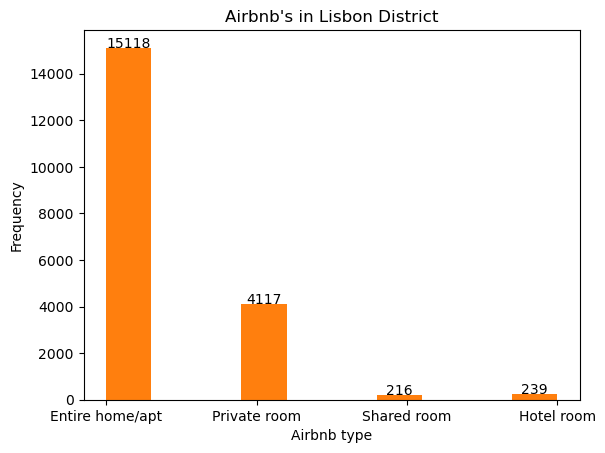

In [543]:
print("There are the following rental categories:\n%s \n" % lisbon_data['room_type'].unique())

plt.hist(lisbon_data['room_type'])
plt.xlabel('Airbnb type')
plt.ylabel('Frequency')
plt.title('Airbnb\'s in Lisbon District')

#get the frequency counts for each bar in the histogram
freqs, bins, patches = plt.hist(lisbon_data['room_type'])

#iterate over the patches and annotate each bar with its frequency value
for patch, freq in zip(patches, freqs):
	height = patch.get_height()
	if freq > 0:
		plt.text(patch.get_x() + patch.get_width() / 2, height + 5, f'{int(freq)}', ha='center')


plt.show()

We have approximately 14.800 Entire apartments or homes available in Lisbon district. That is more than 75% of the offer available.

### Let's see now the Pricing of the Airbnb's


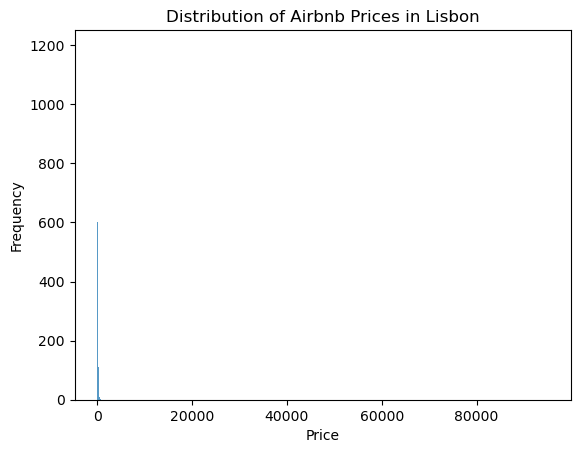

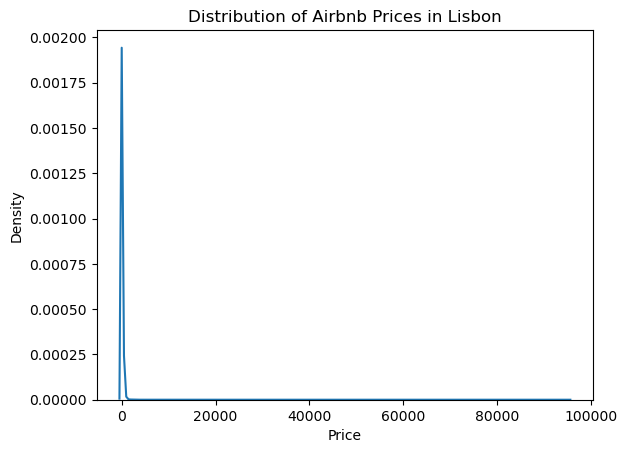

In [544]:
# create a histogram of the price column
sns.histplot(lisbon_data['price'], kde=False)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Prices in Lisbon')

plt.show()

# create a density plot of the price column
sns.kdeplot(lisbon_data['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Airbnb Prices in Lisbon')
plt.show()


In [545]:
lisbon_data['price'].describe()


count    19690.000000
mean       140.624073
std       1164.270441
min          0.000000
25%         58.000000
50%         82.000000
75%        127.000000
max      95119.000000
Name: price, dtype: float64

There are some anomalies in the dataset with the Price range. It seems we have airbnb's listed with prices over 80,000€. The average price per night is 137,93€. Let's take a closer look and discard the excessive prices in our list.

In [546]:
print("highest 15 prices: \n{}".format(lisbon_data['price'].sort_values(ascending=False).head(15)))

highest 15 prices: 
11358    95119
1265     80120
15878    70100
7255     55191
10683    42986
11083    15000
1243     10044
14537     9999
14549     9999
4656      9970
14693     8500
14631     8500
11560     8125
4859      8000
3205      6590
Name: price, dtype: int64


In [547]:
lisbon_data_sorted_price = lisbon_data.sort_values(by='price', ascending=False)

lisbon_data_sorted_price

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11358,Casa Do Rio - Sweet Apartment & Free parking,Frederico,Lisboa,Penha de Frana,38.73343,-9.122290,Entire home/apt,95119,22,9,2022-09-21,0.22,2,0,3
1265,SunHill Villa- Stunning Detached Villa,Nuno,Cadaval,Lamas e Cercal,39.22357,-9.085130,Entire home/apt,80120,3,87,2022-12-04,0.93,1,157,11
15878,Casa do Moleiro - By Moinhos do Magoito,Moinhos,Sintra,So Joo das Lampas e Terrugem,38.85722,-9.430689,Entire home/apt,70100,2,18,2022-11-07,1.94,3,143,18
7255,City Center Artsy Studio in Bairro Alto,João,Lisboa,Misericrdia,38.71223,-9.144820,Entire home/apt,55191,1,154,2022-11-11,2.83,1,1,48
10683,Family apartment Lisbo,Rcgi,Lisboa,Arroios,38.72809,-9.135380,Entire home/apt,42986,1,72,2022-12-13,1.69,11,221,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,ROOM (Doblebed)GUESTS VACCINATED COVID MANDATORY,Maria A.,Mafra,Ericeira,38.96275,-9.415420,Private room,10,10,28,2022-12-09,0.45,2,147,13
6347,"Single Room, 7 min walk from Lisbon Metro (Roo...",João,Amadora,guas Livres,38.74897,-9.217630,Private room,10,4,9,2018-09-01,0.14,4,0,0
9098,January Lisbon City Center,Erico,Lisboa,Arroios,38.73402,-9.134940,Private room,9,8,1,2019-11-17,0.03,1,0,0
12959,Pestana Cascais,Pestana,Cascais,Cascais e Estoril,38.69687,-9.438170,Hotel room,0,1,0,NaN,NaN,1,0,0


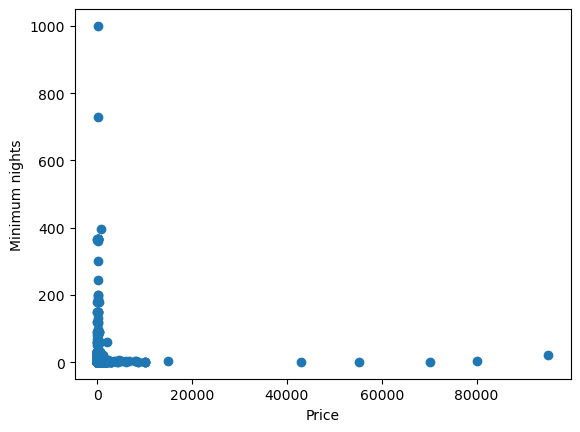

In [548]:
import matplotlib.pyplot as plt

plt.scatter(lisbon_data_sorted_price['price'], lisbon_data_sorted_price['minimum_nights'])
plt.xlabel('Price')
plt.ylabel('Minimum nights')
plt.show()


After a quick search in Airbnb for Lisbon district I can identify that the max range for night filter is up to 400€.
It seems the anomalies should be considered for any price/night above 400€. In any case, let's analyse first any minimun_night required above one week, which should also be disconsidered from our list.

In [549]:
num_zero_price = (lisbon_data['price'] == 0).sum()
print("Number of rows with zero price: ", num_zero_price)


Number of rows with zero price:  2


In [550]:
lisbon_data.sort_values(by='minimum_nights', ascending=False).head(15)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3562,Casa Nelita,Jochen&Nelita,Lourinh,Lourinh e Atalaia,39.24272,-9.33247,Entire home/apt,57,1000,13,2020-08-21,0.17,1,358,0
2821,RefugeeHousing-Available to families with chil...,Sónia E Miguel,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.79676,-9.39047,Entire home/apt,67,730,76,2019-11-07,0.94,1,364,0
10515,Sea view villa,Jose,Cascais,Alcabideche,38.76240,-9.44454,Entire home/apt,850,395,1,2020-08-15,0.04,1,361,0
14790,Apartamento para Estudantes remodelado e equipado,Manuel,Lisboa,Alvalade,38.75724,-9.14223,Entire home/apt,14,365,0,NaN,NaN,1,365,0
240,Santa Catarina * stylish with yard *,Cláudia,Lisboa,Misericrdia,38.71063,-9.15173,Entire home/apt,100,365,390,2020-07-29,3.22,1,0,0
10175,Santa Cruz Beach Apartment,Tereza,Torres Vedras,A dos Cunhados e Maceira,39.13771,-9.37608,Entire home/apt,38,365,14,2020-01-01,0.32,1,0,0
6508,Casa da Oliveira. Your green retreat in Lisbon,Edgar,Lisboa,Alcntara,38.70079,-9.19002,Entire home/apt,65,365,18,2018-10-27,0.33,1,349,0
5406,The Houseum - part house part museum,Tiago,Lisboa,Santo Antnio,38.71776,-9.15225,Entire home/apt,171,365,0,NaN,NaN,1,89,0
499,Príncipe Real sunny flat with view - 31276/AL,Isabel,Lisboa,Santo Antnio,38.71729,-9.15167,Entire home/apt,80,365,75,2018-11-11,0.65,1,256,0
10639,The orange tree house,Manuel,Lisboa,Santo Antnio,38.72490,-9.14584,Entire home/apt,130,365,6,2020-01-31,0.14,2,358,0


Minimum nights seems to be hard to understand. There are airbnb's, as seen above, with a minimum of 1000 nights per stay. That's roughly 2 years and a half. Perhaps the users have inserted the wrong data, however the price/nights seem to be reasonable, so I'll keep this airbnb on my data set, and ignore this columns.

Thus, let us then clean any Airbnb with the price above 500€ per night and price of 0€, and analyse again the graphs.

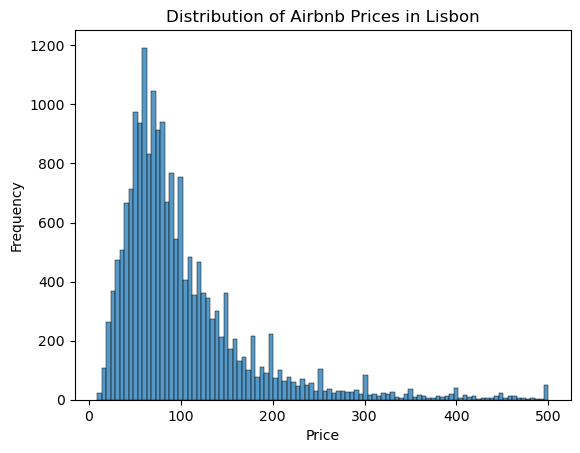

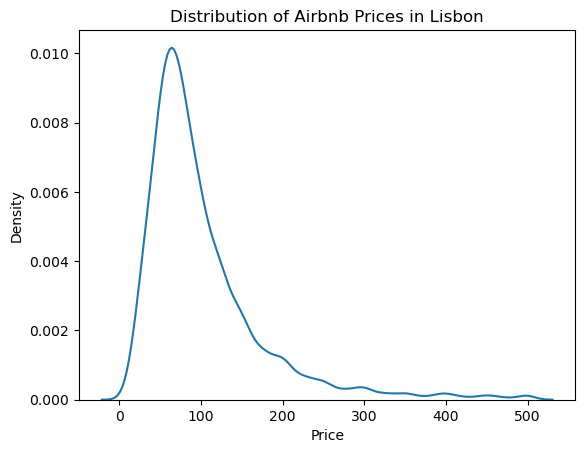

In [551]:
lisbon_data = lisbon_data[(lisbon_data['price'] <= 500) & (lisbon_data['price'] > 0)]

# create a histogram of the price column
sns.histplot(lisbon_data['price'], kde=False)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Prices in Lisbon')

plt.show()

# create a density plot of the price column
sns.kdeplot(lisbon_data['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Airbnb Prices in Lisbon')
plt.show()



We can then conclude that the vast majority of the offer is in the range of 1-200€/night in Lisbon and that there are very little offer of accomodation with prices over 250€.

## Correlation between variables

Let's explore to see if there is any correlation, negative or positive, between the variables of the dataset.

Correlation is a statistical measure that expresses the strength of the relationship between two variables. The two main types of correlation are positive and negative. Positive correlation occurs when two variables move in the same direction; as one increases, so do the other. For example, there is a positive correlation between hours of study and grades on a test. A negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases. For example, there is a negative correlation between smoking and life expectancy.

We will use a Correlation Heatmap:

* Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships.  In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships. The color-coding of the cells makes it easy to identify relationships between variables at a glance.

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

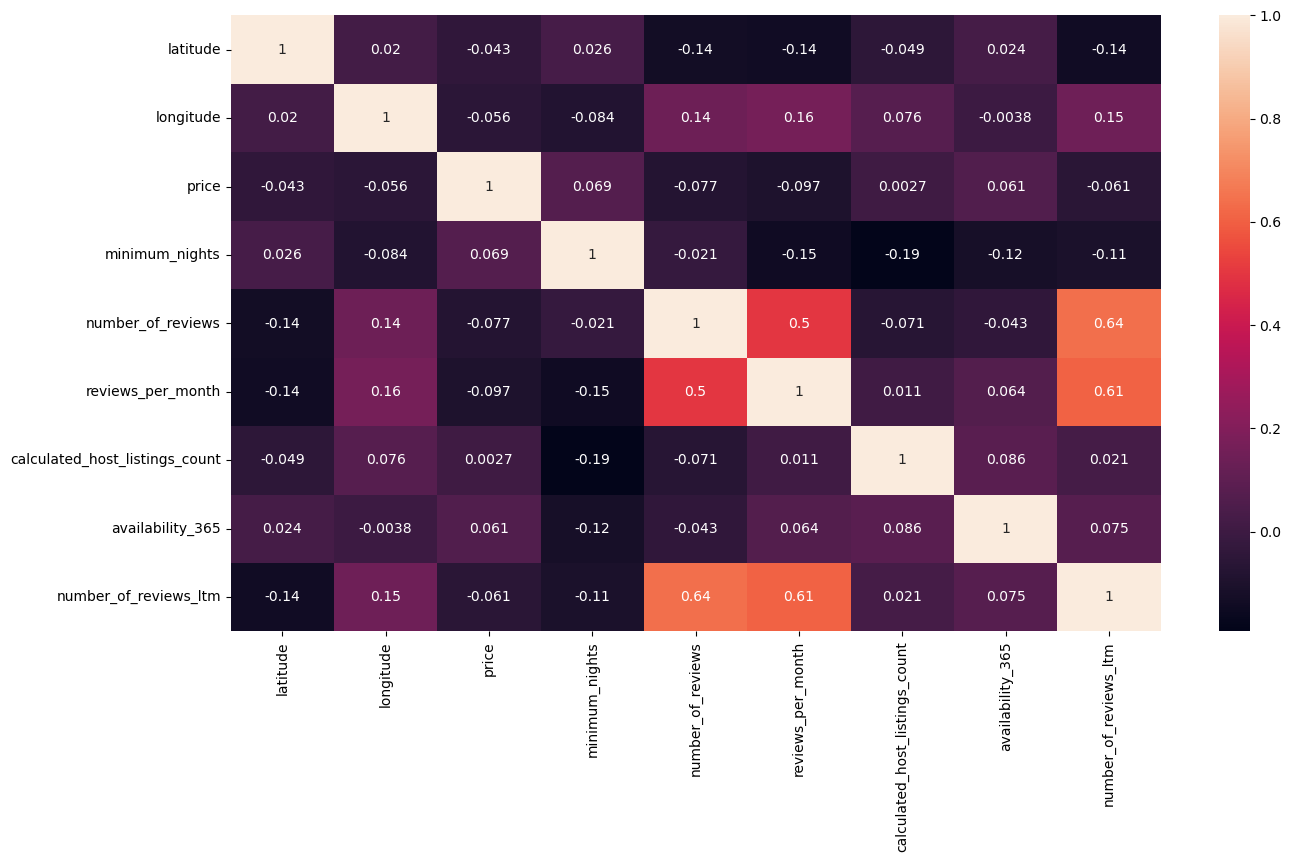

In [552]:
corr_k = lisbon_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr_k, annot=True)
lisbon_data.columns

We can see by the Correlation Heatmap above that the only positive correlations are between reviews, such as the `number of reviews`, `number_of_reviews_Itm` and the `reviews per month`. There is also a very weak positive correlation between `longitude` and the `number of reviews`.

All the remainder have very weak or no correlation.
Since we wanted to analyse any potential correlation between price and latitude & longitude, let's move on into other variables, such as the `neighbourhood`.

## Greater Lisbon's Municipals

In [553]:
print("There are the concelhos in this dataset:\n%s \n" % lisbon_data['neighbourhood_group'].unique())


lisbon_nhd_perc = lisbon_data['neighbourhood_group'].value_counts(normalize=True) * 100
print(lisbon_nhd_perc)



There are the concelhos in this dataset:
['Lisboa' 'Cascais' 'Mafra' 'Sintra' 'Alenquer' 'Lourinh' 'Oeiras'
 'Vila Franca De Xira' 'Cadaval' 'Torres Vedras' 'Amadora'
 'Sobral De Monte Agrao' 'Arruda Dos Vinhos' 'Loures' 'Odivelas'
 'Azambuja'] 

Lisboa                   70.384556
Cascais                   9.243828
Sintra                    6.128047
Mafra                     6.076290
Lourinh                   2.137571
Oeiras                    1.749392
Torres Vedras             1.221469
Loures                    0.864344
Amadora                   0.724600
Odivelas                  0.377827
Alenquer                  0.357124
Cadaval                   0.274313
Vila Franca De Xira       0.248434
Sobral De Monte Agrao     0.103514
Azambuja                  0.062109
Arruda Dos Vinhos         0.046581
Name: neighbourhood_group, dtype: float64


The municipal of Lisboa has ~70% of the airbnb's listed in this dataset, followed by ~9% in Cascais, the litoral municipal of the Greater Lisboa. I will remove the municipals with less than 1%, since they're not relevant for our analysis.



/Users/miguelbelo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



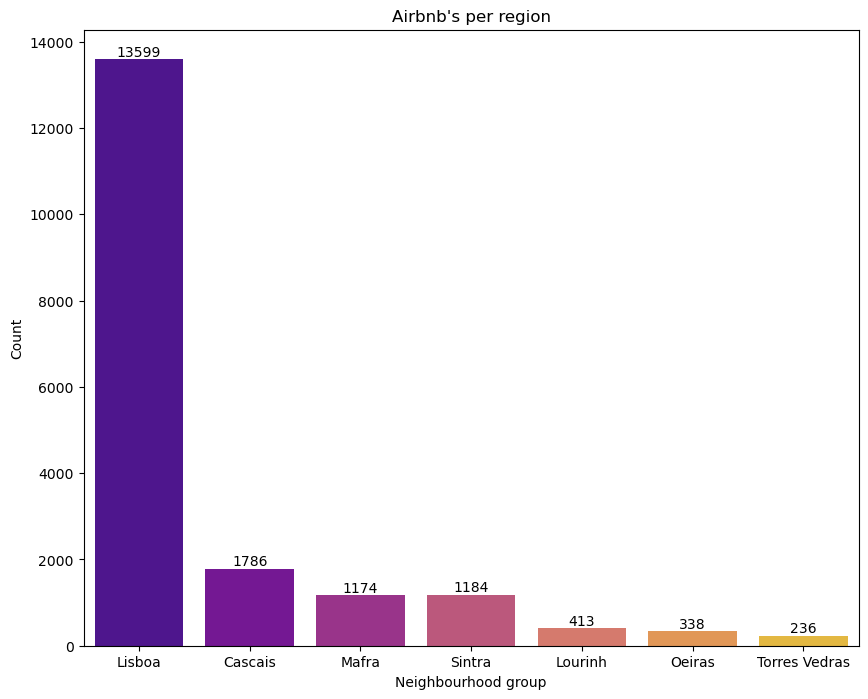

In [554]:
for municipal, freq in lisbon_nhd_perc.items():
    if freq < 1.0:
        lisbon_data = lisbon_data[lisbon_data['neighbourhood_group'] != municipal]


lisbon_data['neighbourhood_group'].value_counts(normalize=True) * 100


sns.countplot(lisbon_data['neighbourhood_group'], palette="plasma")

#Get the current axis object
ax = plt.gca()

#Set the plot title and axis labels
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.title('Airbnb\'s per region')

#iterate over the bars in the plot and add annotations
for bar in ax.patches:
     ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')

#Adjust the plot dimensions
fig = plt.gcf()
fig.set_size_inches(10,8)

plt.show()

/Users/miguelbelo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



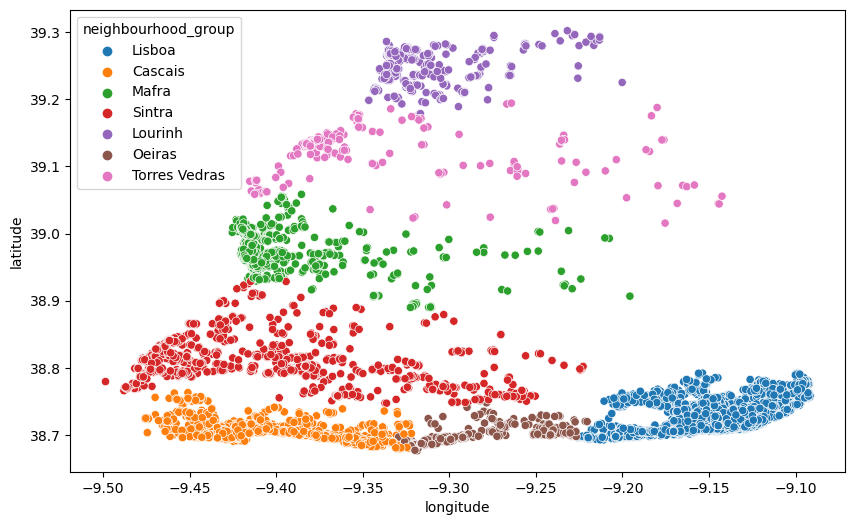

In [555]:
plt.figure(figsize=(10,6))
sns.scatterplot(lisbon_data.longitude,lisbon_data.latitude,hue=lisbon_data.neighbourhood_group)
plt.ioff()

To have an even better percetion of the concentration of the Airbnb's around Lisbon city, let's use an density mapbox.
This way, we can visualise the 70% of Airbnb's concentrated in Lisbon centre, which I'll display below:


In [556]:
px.density_mapbox (lisbon_data, lat = "latitude", lon = "longitude", z = "price", radius = 2.5, center = {"lat": lisbon_data.latitude.mean (), "lon": lisbon_data.longitude.mean ()}, zoom = 10, mapbox_style = "stamen-terrain").show ()


## Concentration of Airbnb's in Lisbon Centre

Let's focus now more on Lisbon Municipal, and analyse the Airbnb distribution per neighbourhood.

Santa Maria Maior         3160
Misericrdia               2310
Arroios                   1724
Santo Antnio              1116
So Vicente                1066
Estrela                    838
Avenidas Novas             502
Penha de Frana             452
Belm                       279
Campo de Ourique           276
Areeiro                    260
Parque das Naes            257
Alcntara                   222
Campolide                  183
Ajuda                      178
Alvalade                   166
Olivais                    156
So Domingos de Benfica     103
Beato                       93
Marvila                     87
Lumiar                      69
Benfica                     50
Carnide                     31
Santa Clara                 21
Name: neighbourhood, dtype: int64

Number of Airbnb's in Lisbon: 13599


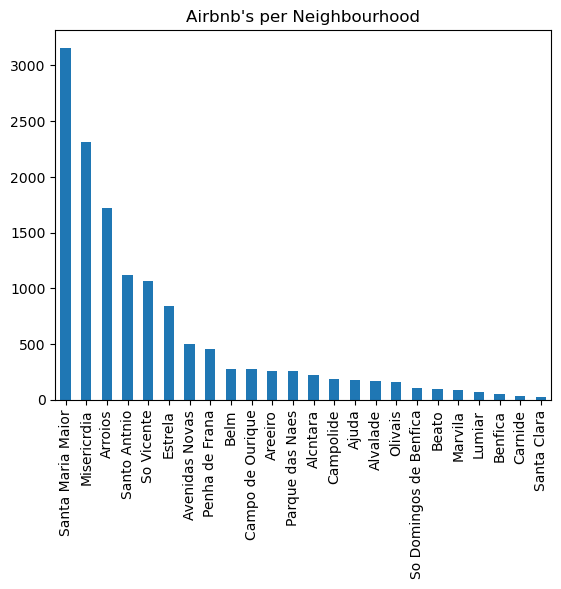

In [557]:
#data series of all neighbourhoods of Lisbon
lisbon_neighbourhoods = lisbon_data.loc[lisbon_data['neighbourhood_group'] == 'Lisboa', 'neighbourhood']

neighbourhoods_counts = lisbon_neighbourhoods.value_counts()

print(neighbourhoods_counts)
print(f"\nNumber of Airbnb's in Lisbon: {len(lisbon_neighbourhoods)}")

neighbourhoods_counts.plot(kind='bar')
plt.title('Airbnb\'s per Neighbourhood')
plt.show()

#Another way of displaying this plot could be with seaborn
#sns.countplot(lisbon_data.loc[lisbon_data['neighbourhood_group'] == 'Lisboa', 'neighbourhood'], palette="plasma")
#fig = plt.gcf()
#fig.set_size_inches(10,10)
#plt.xticks(rotation=90)
#plt.title('Neighbourhood Group')

The vast Majority of Airbnb's are concentrated in the centre downtown of the city

In [558]:
center_municipals = 0

for municipal, freq in neighbourhoods_counts.iteritems():
	if freq > 1000:
		center_municipals += freq
		print(municipal)

print("There are %i airbnb's listed on the municipals above. That is %.2f percent of the total airbnb listed for Lisbon.\n" %(center_municipals, (center_municipals/len(lisbon_neighbourhoods)) * 100) )

Santa Maria Maior
Misericrdia
Arroios
Santo Antnio
So Vicente
There are 9376 airbnb's listed on the municipals above. That is 68.95 percent of the total airbnb listed for Lisbon.



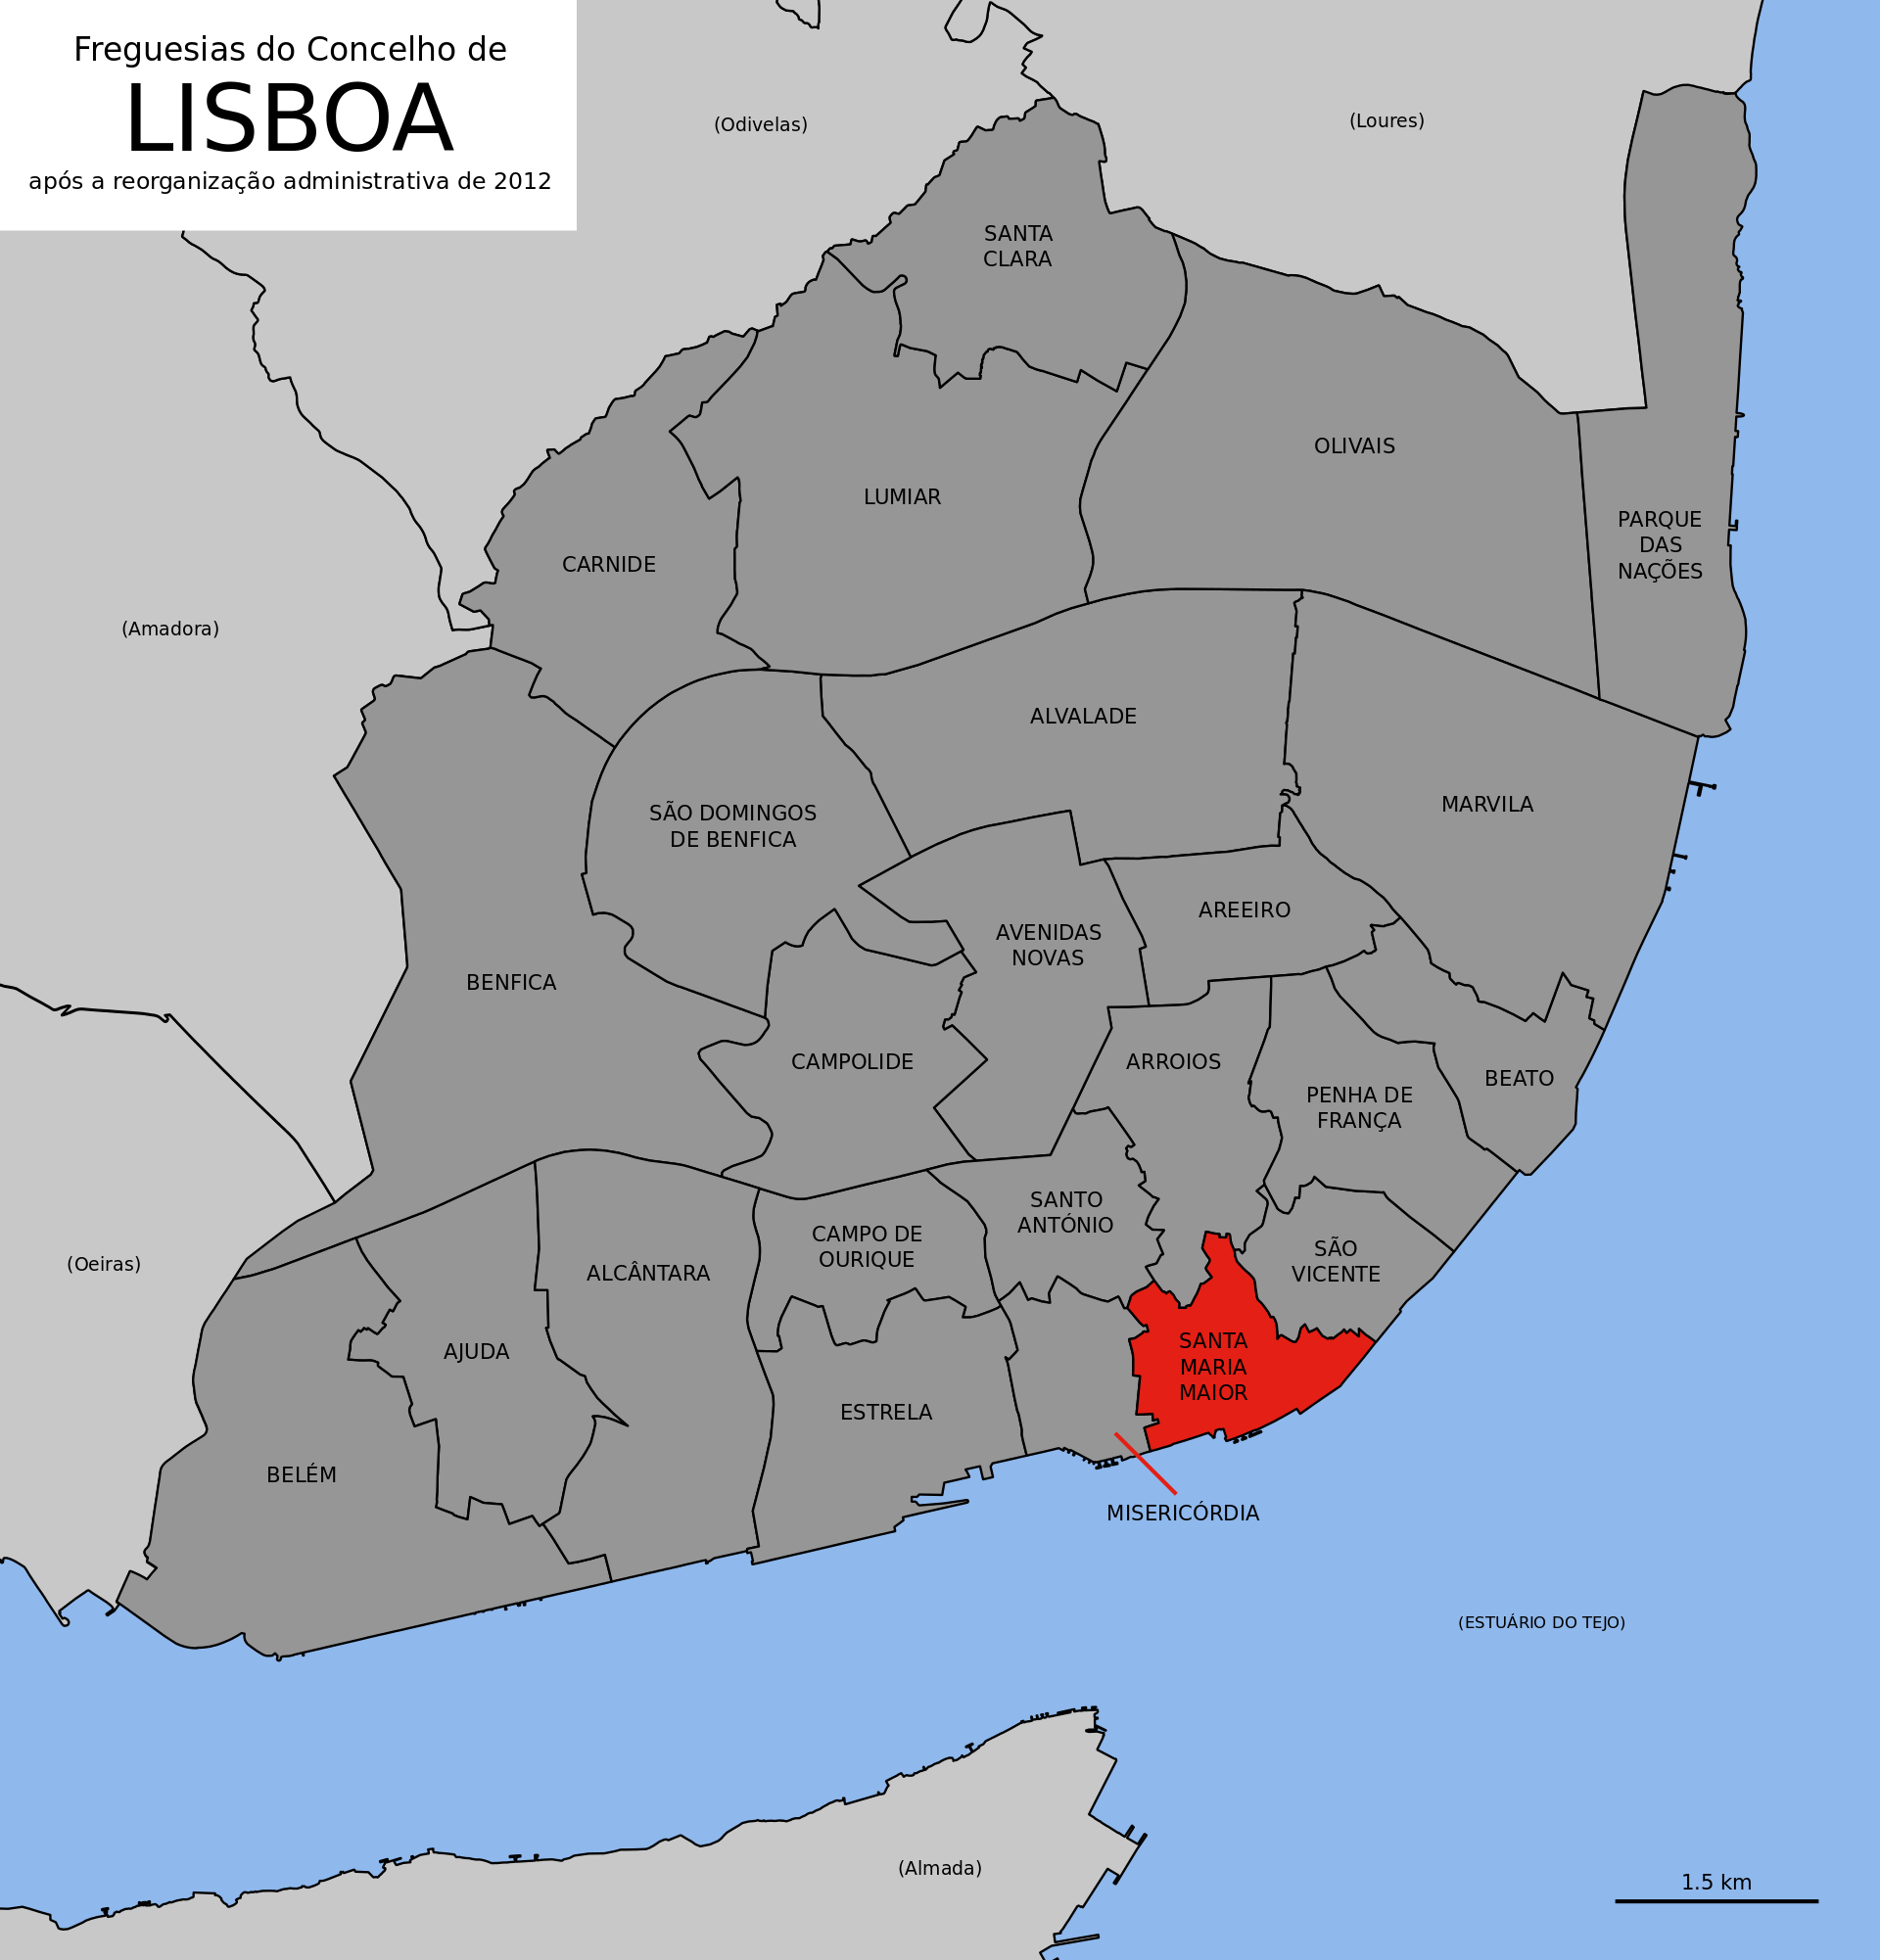

In [559]:
from IPython import display
display.Image("./Lisbon_municipals.svg.png", width=800, height=800)


With the graph bar and the image above we can draw some conclusions regarding the Airbnb list in the city of Lisbon:

* We can understand that most of the Airbnb's are concentrated in the center downtown, more than 50% airbnb's list in Lisbon are in `Santa Maria Maior`, `Misericórdia` and `Arroios`.
* Immediately after, the municipals with higher concentration are in `Santo António` and `São Vicente`, adjacent to the municipals above;

So around this perimeter, we can conclude that 9,376 out of 13,559 airbnb's listed for Lisbon, a quota of `68,95%` are concentrated in the oldtown.


## Typology and pricing of Airbnb's in the city centre

Let's see what is the typology of the airbnb's listed on Lisbon city, and analyse the prices

In [560]:
lisbon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18730 entries, 0 to 19689
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            18725 non-null  object 
 1   host_name                       18730 non-null  object 
 2   neighbourhood_group             18730 non-null  object 
 3   neighbourhood                   18730 non-null  object 
 4   latitude                        18730 non-null  float64
 5   longitude                       18730 non-null  float64
 6   room_type                       18730 non-null  object 
 7   price                           18730 non-null  int64  
 8   minimum_nights                  18730 non-null  int64  
 9   number_of_reviews               18730 non-null  int64  
 10  last_review                     17008 non-null  object 
 11  reviews_per_month               17008 non-null  float64
 12  calculated_host_listings_count  

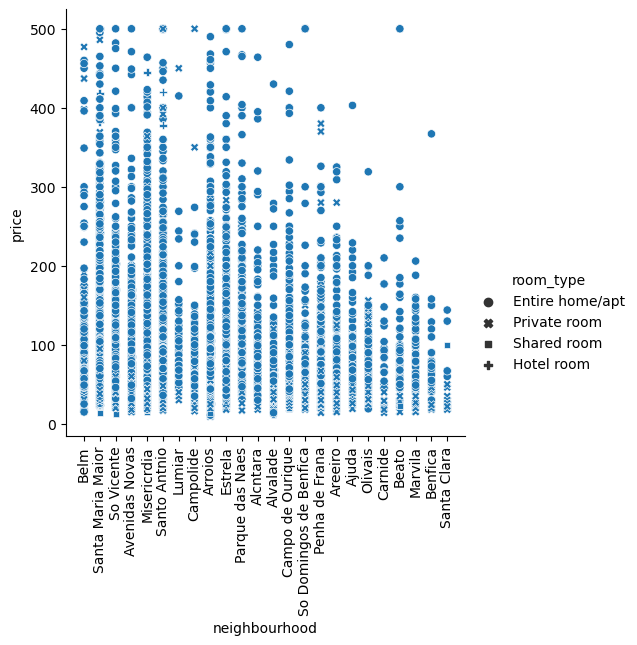

In [561]:
lisbon_data_neighbourhood = lisbon_data[lisbon_data['neighbourhood_group'] == 'Lisboa']

sns.relplot(data=lisbon_data_neighbourhood, x='neighbourhood', y='price', style='room_type', kind='scatter')
plt.xticks(rotation=90)
plt.show()

* It's hard to understand the most expensive neighbourhoods with the graph above, but we can understand that the vast majority of the `cheapest` options in any neighbourhood tends to be `private rooms`.
* As the prices start arising, we start seeing less `private room` and more `entire homes`

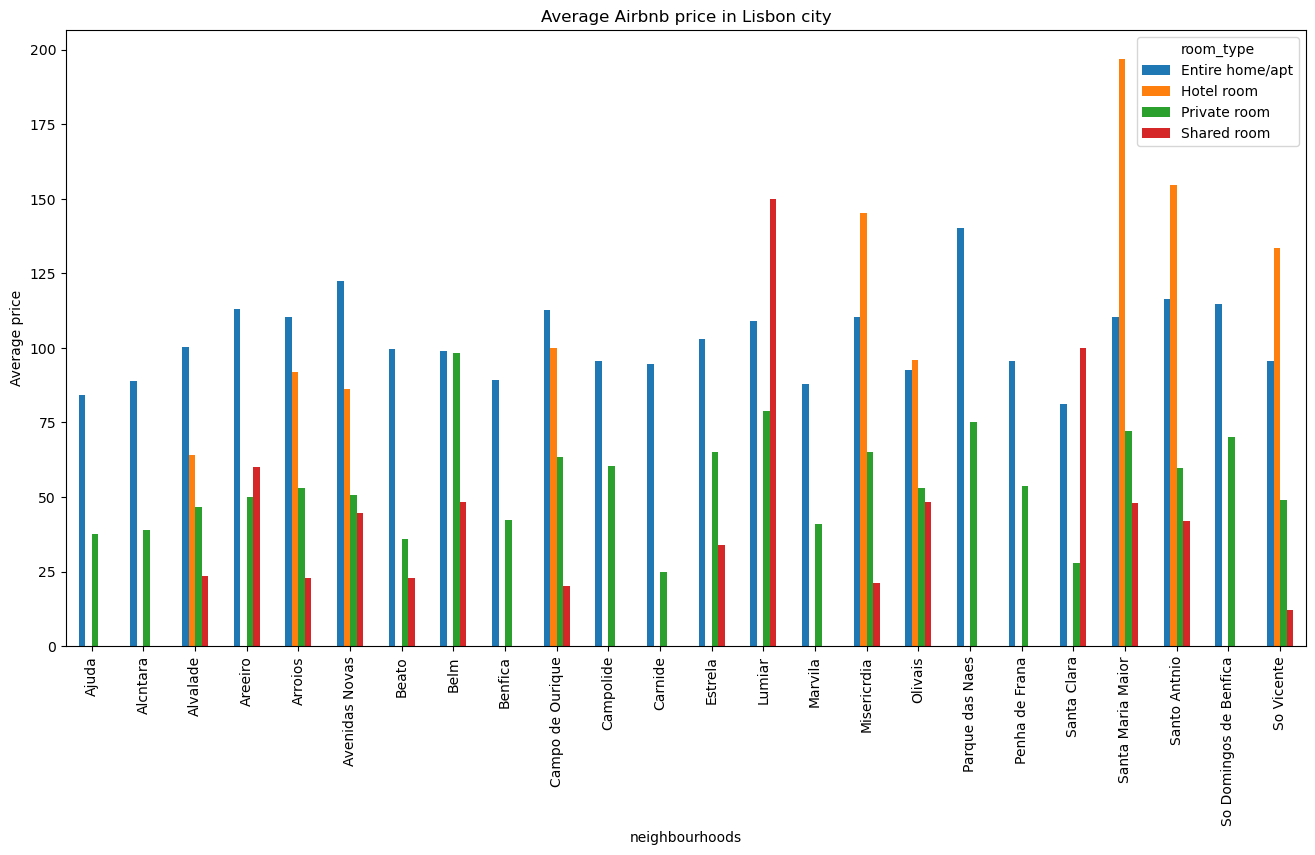

In [562]:
# group the data by 'neighbourhood' and 'room_type' and calculate the mean of 'price'
grouped_data = lisbon_data_neighbourhood.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()


# create a pivot table with 'neighbourhood' as rows, 'room_type' as columns, and 'price' as values
pivot_data = grouped_data.pivot(index='neighbourhood', columns='room_type', values='price')

# create a bar chart of the pivot table
pivot_data.plot(kind='bar', figsize=(16,8))
plt.title('Average Airbnb price in Lisbon city')
plt.xlabel('neighbourhoods')
plt.ylabel('Average price')
plt.show()

#### Prices

Regarding Entire homes we can see that:

* `Parque das Nações` has the highest average price offer, followed by `Avenidas Novas`, both with an average of `125€/night`;
* `Santa Maria Maior`, `Misericordia` and `São Vicente` the most central and with the highest offer, have an average price closer to the `100€/night` range;
* The further away from the centre, the cheapest, which is the case of `Ajuda`, `Benfica` or `Alcantara`, with an avg price closer to the `75€/night` range;

If you want to stay in Lisbon for a couple of days on a tight budget, you can expect an `avg price per night lower than 25€` in an `hostel/shared room`

## Conclusion

With all the information displayed above, we can have several conclusions:

* A `portuguese family` in Lisbon district has seen the **availabity of apartments to rent decrease**, since `15.118` apartments are now Airbnb's for tourism;

* The centre of Lisbon is now full of Airbnb's, especially around the oldtown, in the municipals of `Santa Maria Maior` and `Misericórdia`, with over 50% of the airbnb's available in the city;

* A `tourist` on a tight budget can visit the city, in the centre, for a week (7 days), in a `shared room` for less than 200€.

* The Lisbon district has a very **concentrated offer of Airbnb's in the Lisbon city**, with `70%` of the total offer, followed by the coastal municipal, `Cascais`, with `10%` of the offer available.